# Logistic Regression

## IRIS data set
Attribute Information:

<li> sepal length in cm
<li> sepal width in cm
<li> petal length in cm
<li> petal width in cm
<li> class:
<li> Iris Setosa
<li> Iris Versicolour
<li>Iris Virginica
    
[Dataset Download Link](https://archive.ics.uci.edu/ml/datasets/machine-learning-databases/iris/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1 Preprocessing

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# droping the unnamed column 
df= df.drop('Unnamed: 0',axis=1)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking the types available in Species and storing in a list called species
species  = list(df['Species'].unique())

In [5]:
df["Species_index"] = df["Species"].apply(species.index)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_index
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
# checking wheather any missing value or not 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Species_index    0
dtype: int64

In [7]:
x = df.drop(['Species','Species_index'],axis = 1).values
y = df['Species_index'].values

## Part 2 Dividing data into two part test and train

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=5)

## Part 3 Training 

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.score(x_test, y_test)

0.98

#### Prediction 

In [14]:
y_predicted = model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

Text(69.0, 0.5, 'Actual')

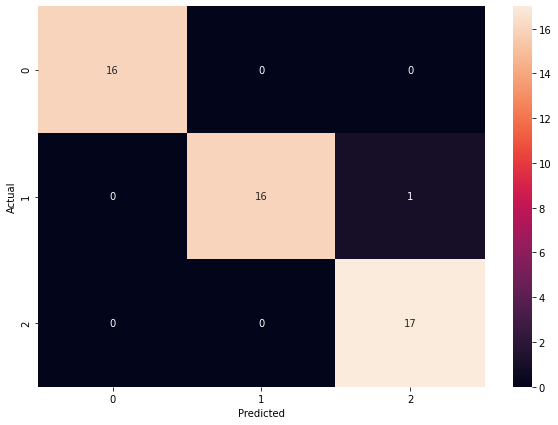

In [16]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



#### Creating csv file with Actual and predicted values 

In [18]:
secDF = pd.DataFrame(data={"Acual Value": y_test, "Predicted Value": y_predicted})

In [19]:
secDF.to_csv("Difference.csv")

In [20]:
secDF

,Acual Value,Predicted Value
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
5,1,1
6,0,0
7,1,2
8,0,0
9,1,1


In [22]:
from sklearn import preprocessing

In [23]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Species'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [25]:
mlr = LogisticRegression()

In [26]:
mlr.fit(x_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = mlr.predict(x_test)

In [28]:
predValue = mlr.predict([[14,15,16,20]])
predValue[0]

2

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_pred, y_test)

1.0

In [32]:
dfOutput = pd.DataFrame({'Y': y_test, 'Y Pred': y_pred})

In [33]:
dfOutput

,Y,Y Pred
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1
